<a href="https://colab.research.google.com/github/nayeer1169/OIBSIP/blob/main/TASK%202/Umemployment_Analysis_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Unemployment Analysis With Python
###Made By- Nayeer Naushad
###Importing Libraries

In [20]:
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [21]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline
sns.set_style("darkgrid")
sns.set(rc={'figure.figsize':(7,5)})

import warnings
warnings.filterwarnings('ignore')

In [22]:
data = pd.read_csv('Unemployment in India.csv' , skipinitialspace = True)
data.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [23]:
data_2 = pd.read_csv('Unemployment_Rate_upto_11_2020.csv' )
data_2.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [24]:
print("FIRST Dataset:\nNumber of rows : %d\nNumber of columns : %d" %(data.shape))
print("\n\nSecond Dataset:\nNumber of rows : %d\nNumber of columns : %d" %(data_2.shape))

#These are the dimension of first dataset

FIRST Dataset:
Number of rows : 768
Number of columns : 7


Second Dataset:
Number of rows : 267
Number of columns : 9


In [25]:
data.isnull().sum()

#this code will sum of all the  Null value

Region                                     28
Date                                       28
Frequency                                  28
Estimated Unemployment Rate (%)            28
Estimated Employed                         28
Estimated Labour Participation Rate (%)    28
Area                                       28
dtype: int64

In [26]:
data = data.dropna()

In [27]:
data.columns = ['Region','Date','Frequency','Unemployment_Rate','Employed','Labour_Participation_Rate','Area']

data['Date'] = data['Date'].astype('datetime64[ns]')

data["Day"] = data["Date"].map(lambda x: x.day)
data["Month"] = data["Date"].map(lambda x: x.month)
data["Year"] = data["Date"].map(lambda x: x.year)
data.head()

,Region,Date,Frequency,Unemployment_Rate,Employed,Labour_Participation_Rate,Area,Day,Month,Year
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,31,5,2019
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural,30,6,2019
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural,31,7,2019
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural,31,8,2019
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural,30,9,2019


In [28]:
data_2.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

In [29]:
for col in data_2.columns:
  print(col)

Region
 Date
 Frequency
 Estimated Unemployment Rate (%)
 Estimated Employed
 Estimated Labour Participation Rate (%)
Region.1
longitude
latitude


In [30]:
data_2.columns = ['Region','Date','Frequency','Unemployment_Rate','Employed','Labour_Participation_Rate','Area','longitude','latitude']
data_2.head()

,Region,Date,Frequency,Unemployment_Rate,Employed,Labour_Participation_Rate,Area,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [31]:
data_2['Date'] = data_2['Date'].astype('datetime64[ns]')

data_2['Day'] = data_2['Date'].map(lambda x: x.day)
data_2['Month'] = data_2['Date'].map(lambda x: x.month)
data_2['Year'] = data_2['Date'].map(lambda x: x.year)

data_2.head()

,Region,Date,Frequency,Unemployment_Rate,Employed,Labour_Participation_Rate,Area,longitude,latitude,Day,Month,Year
0,Andhra Pradesh,2020-01-31,M,5.48,16635535,41.02,South,15.9129,79.74,31,1,2020
1,Andhra Pradesh,2020-02-29,M,5.83,16545652,40.90,South,15.9129,79.74,29,2,2020
2,Andhra Pradesh,2020-03-31,M,5.79,15881197,39.18,South,15.9129,79.74,31,3,2020
3,Andhra Pradesh,2020-04-30,M,20.51,11336911,33.10,South,15.9129,79.74,30,4,2020
4,Andhra Pradesh,2020-05-31,M,17.43,12988845,36.46,South,15.9129,79.74,31,5,2020


##Exploring Data Analysis

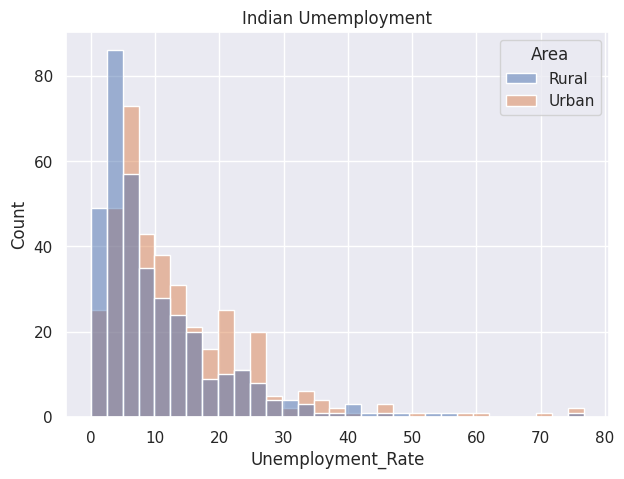

In [32]:
#first dataset
plt.title("Indian Umemployment")
sns.histplot(x="Unemployment_Rate",hue="Area",data=data)
plt.show()

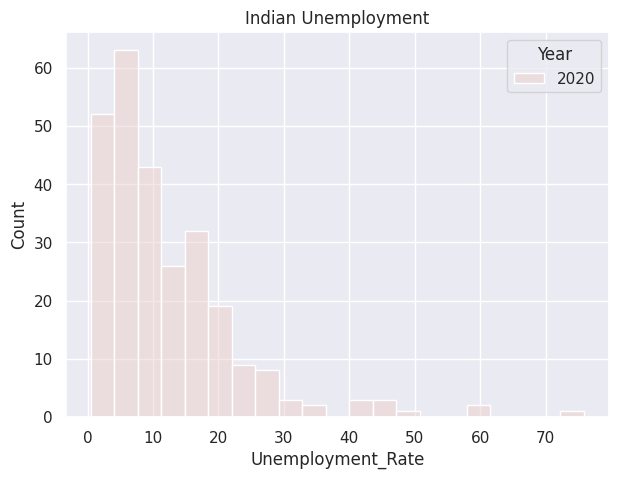

In [33]:
#second dataset
plt.title("Indian Unemployment")
sns.histplot(x="Unemployment_Rate",hue="Year",data=data_2)
plt.show()

In [34]:
!pip install seaborn==0.11.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


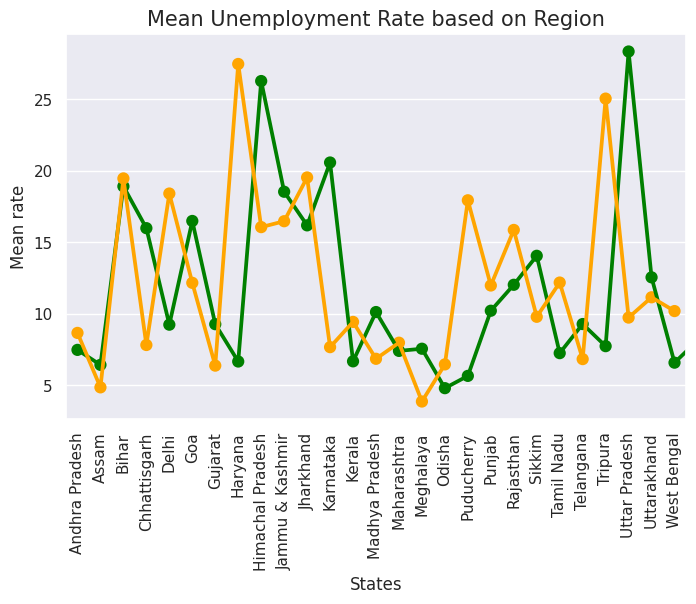

In [35]:
# take the mean of rate state by state
grouped_df = data.groupby(["Region"])["Unemployment_Rate"].aggregate("mean").reset_index()
grouped_df2 = data_2.groupby(["Region"])["Unemployment_Rate"].aggregate("mean").reset_index()

plt.figure(figsize=(8,5))
color=['Green','Orange']
sns.pointplot(grouped_df['Region'].values, grouped_df['Unemployment_Rate'].values, alpha=0.8, color=color[0])
sns.pointplot(grouped_df2['Region'].values, grouped_df2['Unemployment_Rate'].values, alpha=0.8, color=color[1])
plt.ylabel('Mean rate', fontsize=12)
plt.xlabel('States', fontsize=12)
plt.title("Mean Unemployment Rate based on Region", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

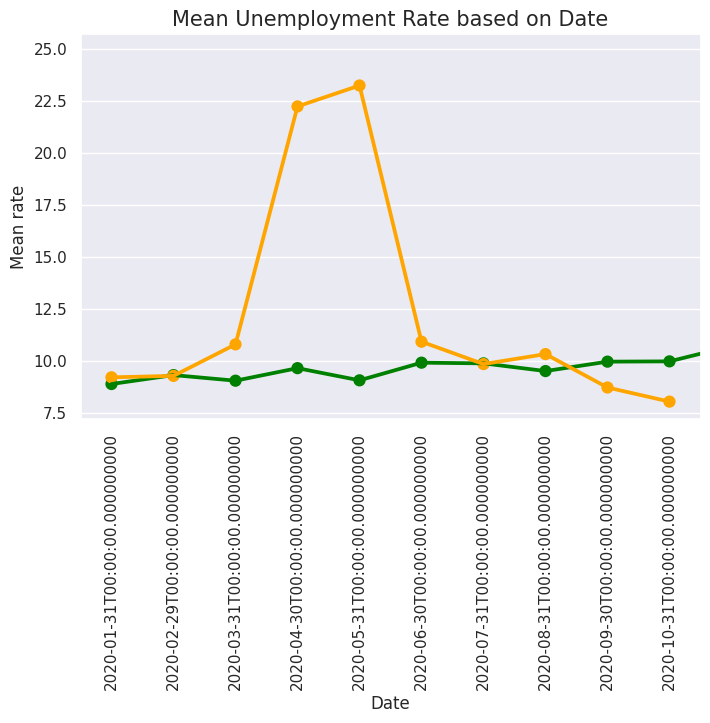

In [36]:
# take the mean of rate state by state
grouped_df = data.groupby(["Date"])["Unemployment_Rate"].aggregate("mean").reset_index()
grouped_df2 = data_2.groupby(["Date"])["Unemployment_Rate"].aggregate("mean").reset_index()

plt.figure(figsize=(8,5))
color=['Green','Orange']
sns.pointplot(grouped_df['Date'].values, grouped_df['Unemployment_Rate'].values, alpha=0.8, color=color[0])
sns.pointplot(grouped_df2['Date'].values, grouped_df2['Unemployment_Rate'].values, alpha=0.8, color=color[1])
plt.ylabel('Mean rate', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.title("Mean Unemployment Rate based on Date", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()